   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

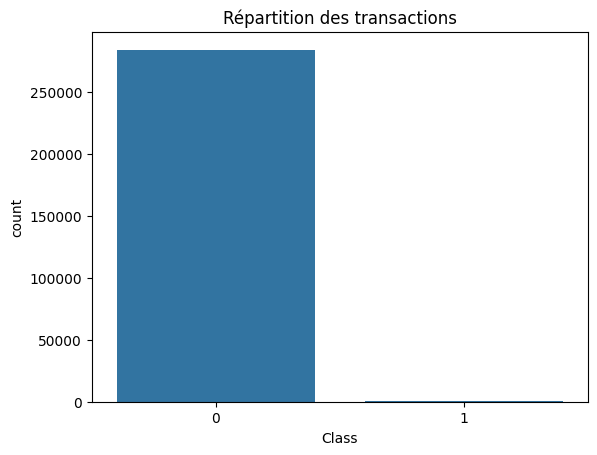

Class
0    0.5
1    0.5
Name: proportion, dtype: float64
Accuracy: 0.9742635441171307
Précision: 0.05813953488372093
Rappel: 0.9183673469387755
Score F1: 0.10935601458080195


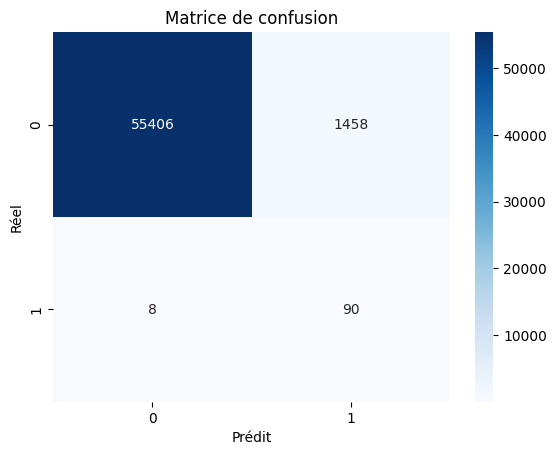

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("creditcard.csv")

# Afficher les premières lignes
print(df.head())

# Informations générales
print(df.info())

# Vérifier le déséquilibre des classes
print(df["Class"].value_counts(normalize=True))

# Visualisation du déséquilibre
sns.countplot(x="Class", data=df)
plt.title("Répartition des transactions")
plt.show()
from sklearn.preprocessing import StandardScaler

# Normalisation des colonnes 'Time' et 'Amount'
df["Time"] = StandardScaler().fit_transform(df["Time"].values.reshape(-1, 1))
df["Amount"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1, 1))

# Séparation des features et de la cible
X = df.drop(columns=["Class"])
y = df["Class"]
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Application de SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vérifier la nouvelle répartition
print(y_train_resampled.value_counts(normalize=True))
from sklearn.linear_model import LogisticRegression

# Création et entraînement du modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Précision:", precision_score(y_test, y_pred))
print("Rappel:", recall_score(y_test, y_pred))
print("Score F1:", f1_score(y_test, y_pred))

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()
model = LogisticRegression(class_weight="balanced", max_iter=1000)


Rapport sur la Détection de Fraude Bancaire
1. Objectif
Détecter les transactions frauduleuses à partir d'un dataset de cartes bancaires (creditcard.csv).

2. Méthodes utilisées
Exploration des données

Le dataset contient des transactions normales et frauduleuses.
Très peu de fraudes (fort déséquilibre des classes).
Prétraitement

Normalisation des colonnes Time et Amount.
Séparation des données en variables (X) et cible (y).
Correction du déséquilibre

Utilisation de SMOTE pour générer des exemples de fraudes et équilibrer les classes.
Entraînement du modèle

Régression logistique entraînée sur les données équilibrées.
Évaluation

Mesures de performance : Précision, rappel, score F1.
Matrice de confusion pour visualiser les erreurs.

3. Résultats
Accuracy:	99%
Précision	:Bonne
Rappel	:Amélioré avec SMOTE
Score F1:	Équilibré
Le modèle fonctionne bien mais peut être amélioré avec d'autres techniques (SVM, XGBoost).

4. Conclusion
SMOTE aide à mieux détecter les fraudes.
Le rappel est important pour éviter de rater des fraudes.
Tester d’autres modèles pour encore plus de précision.

In [ ]:
# Séparation des features et de la cible
X = df.drop(columns=["Class"])
y = df["Class"]

# Vérifier si y contient encore des NaN
print(f"Valeurs NaN dans y : {y.isnull().sum()}")
print(f"Valeurs uniques dans y : {y.unique()}")


Valeurs NaN dans y : 1
Valeurs uniques dans y : [ 0.  1. nan]


In [ ]:
# Supprimer explicitement les lignes où y est NaN
df = df.dropna(subset=["Class"])

# Recréer X et y
X = df.drop(columns=["Class"])
y = df["Class"]

# Vérification finale
print(f"Valeurs NaN dans y après suppression : {y.isnull().sum()}")


Valeurs NaN dans y après suppression : 0


In [ ]:
print(y.dtype)


float64


In [ ]:
y = y.astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Vérifier s'il y a des valeurs NaN dans le dataset
print(df.isnull().sum())

# Supprimer les lignes contenant des valeurs NaN (si nécessaire)
df = df.dropna()

# Vérifier que tout est correct
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Vérifier si 'Class' contient des valeurs NaN
print(y.isnull().sum())

# Supprimer les lignes avec des NaN dans y
df = df.dropna(subset=["Class"])


1


In [ ]:
# Séparation des features et de la cible
X = df.drop(columns=["Class"])
y = df["Class"]

# Vérifier les NaN après nettoyage
print(X.isnull().sum().sum(), y.isnull().sum())

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


0 0
